<a href="https://colab.research.google.com/github/Deven876/project-2-NYC-Taxi-Trip-Time-Prediction/blob/main/project_2_Taxi_Trip_Time_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

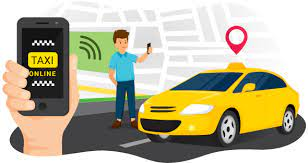
# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Architecture

Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing 

In [2]:
# importing required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')


In [3]:
# importing dataset and reading 
file='/content/drive/MyDrive/taxi trip time prediction/NYC Taxi Data.csv'
data=pd.read_csv(file)
data1=data.copy() # making a copy 

# Data Inspection


In [4]:
# First look 
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
# looking into shape of dataset
data1.shape
print('number of rows',data1.shape[0])
print('number of columns',data1.shape[1])

number of rows 1458644
number of columns 11


In [6]:
# # looking into information(datatype,columns,null/non-null count)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
# looking in descriptive summary of dataset
data1.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Handling missing values  

In [8]:
# looking for missing values in dataset 
data1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### ohh! thats great no missing values/Null values to deal with, lets say its blessing in disguise

## looking for unique values

In [9]:
# Let us check for unique values in columns.

print(data1.nunique().sort_values())

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


There are 2 unique vendor ids.

There are 10 unique passenger counts.

There are 2 unique values in store_and_fwd_flag, that we also saw in the description of the variables, i.e Y and N.

Text(0.5, 1.0, 'Descriptive Stats')

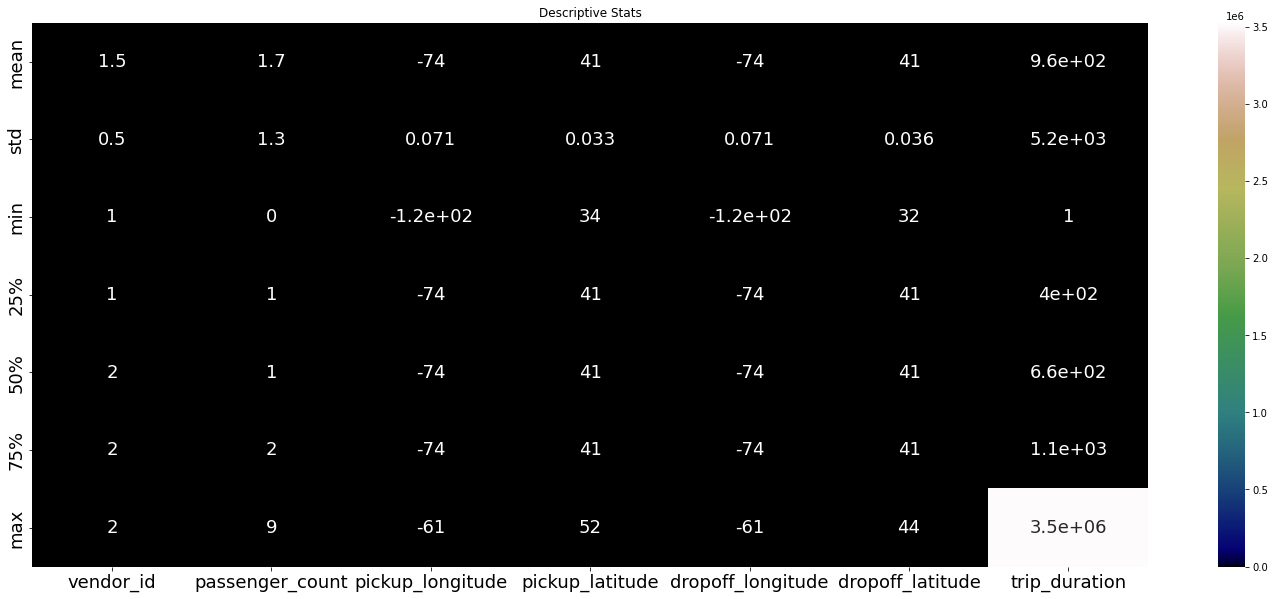

In [10]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(data1.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

# Feature Creation and Engineering
- Let us create some new features from the existing so that we can gain more insights from the data.

 - pickup_datetime and dropoff_datetime were both of type object.
 we can convert it to datetime object which contains numerous functions with which we can create new features.

In [11]:
# convert object type to datetime 
data1['pickup_datetime']=pd.to_datetime(data1['pickup_datetime']) 
data1['dropoff_datetime']=pd.to_datetime(data1['dropoff_datetime'])

- Now that we have converted object type to datetime64 we can extract and create new features from this datetime feature

In [12]:
# extracting further information from datetime feature
data1['pickup_day']=data1['pickup_datetime'].dt.day
data1['pickup_month']=data1['pickup_datetime'].dt.month
data1['pickup_weekday']=data1['pickup_datetime'].dt.weekday
data1['pickup_hour']=data1['pickup_datetime'].dt.hour
data1['pickup_date']=data1['pickup_datetime'].dt.date
data1['pickup_min']=data1['pickup_datetime'].dt.minute

- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them.

In [13]:
# we will need to import library to calculate distances given in geographical coordinates
from geopy.distance import great_circle


- lets define a function to take coordinates as inputs and return distance

In [14]:
#distance_calc is a function to calculate distance between pickup and dropoff coordinates.
def distance_calc(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
 
  return great_circle(start_coordinates,stop_coordinates).km


- lets apply above function on given datset and create new feature as distance to define it 

In [15]:
data1['distance']=data1.apply(lambda x: distance_calc(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [16]:
# lets take a look at dataset set to check whether features creation and engineering got reflected in our dataset
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_date,pickup_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,0,17,2016-03-14,24,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,2016-06-12,43,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,2016-01-19,35,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,2,19,2016-04-06,32,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,5,13,2016-03-26,30,1.188590


In [17]:
# lets check dtypes before jumping into eda and preprocessing
data1.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


# Eda and Data Preprocessing

## univariate Analysis 

 A) **Vendor Id**

Text(0.5, 1.0, 'vendor_ids')

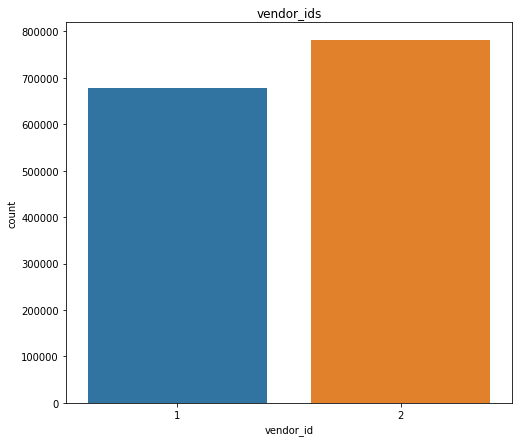

In [22]:
# vendor id visualization
plt.figure(figsize=(8,7))
sns.countplot(data1['vendor_id'])
plt.title('vendor_ids')


- From Above Visualization, we can say that there are **2 vendors**


- 2nd Service provider is the most preferred one by New Yorkers.

B) **Store and forward flag**

Text(0.5, 1.0, 'Store and Forward Flag')

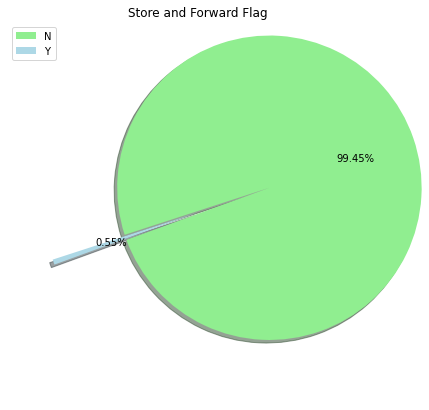

In [24]:
#Store & Forward flag visualization

plt.figure(figsize=(8,7))
plt.pie(data1['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightblue'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag")

In [25]:
data1['store_and_fwd_flag'].value_counts() # to get exact count of stored trips

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

- We see there are less than 1% of trips that were stored before forwarding

- The number of N flag is much larger than Y flag

